# i. Topik Permasalahan

**Latar Belakang**

Perubahan iklim menjadi tantangan global yang mendesak. Untuk mengatasinya, transisi dari bahan bakar fosil ke sumber energi bersih dan terbarukan menjadi krusial. Akses terhadap energi, khususnya listrik, adalah fundamental bagi pembangunan sosial dan ekonomi.

**Identifikasi Masalah**

Menggunakan SMART Framework:
* S: Ingin mengidentifikasi tingkat energi listrik yang dihasilkan di beberapa negara, untuk mencari gambaran jelas mengenai berapa banyak emisi CO2 yang dihasilkan oleh negara negara tersebut
* M: Perhitungan mengenai tingkat energi listrik yang dihasilkan dan tingkat emisi CO2 disuatu negara
* A: Melakukan analisis data Access to electricity, GDP per capita, Electricity from fossil fuels, Electricity from nuclear, Electricity from renewables, Value CO2 Emission, serta produksi energi bersih yang dihasilkan oleh negara berkembang dan negara maju
* R: Memfokuskan identifikasi terhadap tingkat energi listrik dan kesejahteraan penduduk
* T: Hasil analisis ini akan diselesaikan dalam waktu 1 minggu

**Problem Statement:**

Dapat mengidentifikasi data mengenai tingkat energi listrik dan tingkat emisi CO2 di suatu negara, untuk memberikan gambaran mengenai jumlah energi dan tingkat emisi CO2 yang dihasilkan oleh negara tersebut dengan menganalisa data dalam 1 minggu

**Breaking Down the Problem**
1. Negara mana yang menjadi top 5 penghasil listrik dari bahan bakar fosil, nuklir, dan energi terbarukan dalam 5 tahun terakhir?
2. Bagaimana perbandingan tingkat emisi CO2 yang dihasilkan oleh listrik yang berbahan bakar fossil, nuklir, dan terbarukan dari top 5 negara penghasil energi listrik dalam 5 tahun terakhir?
3. Bagaimana pengaruh bantuan keuangan dari negara maju terhadap negara berkembang terhadap pengembangan energi bersih dalam  5 tahun terakhir?
4. Bagaimana hubungan antara akses listrik dengan kesejahteraan penduduk di negara yang bersangkutan dalam 5 tahun terakhir?
5. Apakah ada perbedaan antara produksi energi bersih dari negara maju dengan produksi energi bersih dari negara berkembang dalam 5 tahun terakhir?

# ii. Data Loading

**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as stats
from scipy.stats import shapiro

**Loading Data Set**

In [3]:
df_fact = pd.read_csv(r"D:\VSCODE\df_fact.csv")
df_country = pd.read_csv(r"D:\VSCODE\df_country.csv")
df_country_economic = pd.read_csv(r"D:\VSCODE\df_country_economic.csv")

**Data Exploration**

In [4]:
df_fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country_name                3649 non-null   object 
 1   year                        3649 non-null   int64  
 2   access_electricity          3649 non-null   float64
 3   access_clean_fuels          3649 non-null   float64
 4   renewable_electricity       3649 non-null   float64
 5   financial_flows             3649 non-null   float64
 6   renewable_energy_share      3649 non-null   float64
 7   electricity_fossil_fuels    3649 non-null   float64
 8   electricity_nuclear         3649 non-null   float64
 9   electricity_renewables      3649 non-null   float64
 10  low_carbon_electricity      3649 non-null   float64
 11  primary_energy_consumption  3649 non-null   float64
 12  energy_intensity_level      3649 non-null   float64
 13  value_co2_emissions         3649 

In [5]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  176 non-null    object 
 1   density       176 non-null    float64
 2   land_area     176 non-null    float64
 3   latitude      176 non-null    float64
 4   longitude     176 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
df_country_economic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    3649 non-null   object 
 1   year            3649 non-null   int64  
 2   gdp_growth      3649 non-null   float64
 3   gdp_per_capita  3649 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 114.2+ KB


**Modifying Data For Analytics Purpose**

In [7]:
# Menggabungkan table
df_merged = df_fact.merge(df_country_economic, on=["country_name", "year"], how="left")
df_merged = df_merged.merge(df_country, on="country_name", how="left")
latest_gdp_data = df_country_economic.loc[df_country_economic.groupby("country_name")["year"].idxmax(), ["country_name", "gdp_per_capita"]]

# Membuat threshold untuk kolom baru
threshold_gdp_per_capita = 12000

# Mengisi kolom baru dengan kriteria yang sudah dibuat
latest_gdp_data["country_classification"] = latest_gdp_data["gdp_per_capita"].apply(
    lambda x: "Developed Country" if x >= threshold_gdp_per_capita else "Developing Country"
)

# Membuat DataFrame baru
df_new = df_merged.merge(latest_gdp_data[["country_name", "country_classification"]], on="country_name", how="left")
df_new.head()

,country_name,year,access_electricity,access_clean_fuels,renewable_electricity,financial_flows,renewable_energy_share,electricity_fossil_fuels,electricity_nuclear,electricity_renewables,...,energy_intensity_level,value_co2_emissions,renewables,gdp_growth,gdp_per_capita,density,land_area,latitude,longitude,country_classification
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,1.64,760.000000,0.0,0.000000,0.000000,60.0,652230.0,33.93911,67.709953,Developing Country
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,1.74,730.000000,0.0,0.000000,0.000000,60.0,652230.0,33.93911,67.709953,Developing Country
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,1.40,1029.999971,0.0,0.000000,179.426579,60.0,652230.0,33.93911,67.709953,Developing Country
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,1.40,1220.000029,0.0,8.832278,190.683814,60.0,652230.0,33.93911,67.709953,Developing Country
4,Afghanistan,2004,20.064968,10.9,7.75,0.0,44.24,0.33,0.0,0.56,...,1.20,1029.999971,0.0,1.414118,211.382074,60.0,652230.0,33.93911,67.709953,Developing Country


# iii. Analytics

**EDA**

**Q1. Negara mana yang menjadi top 5 penghasil listrik dari bahan bakar fosil, nuklir, dan energi terbarukan dalam 5 tahun terakhir?**

**TOP 5**

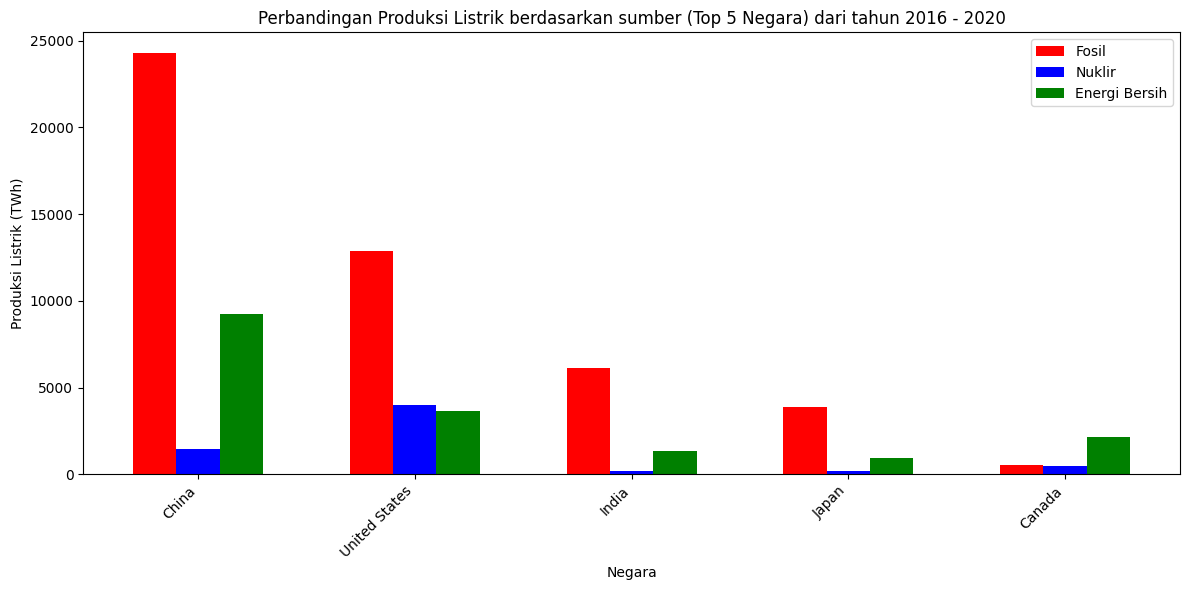

In [8]:
# Filter data untuk tahun 2016 - 2020
years = [2016, 2017, 2018, 2019, 2020]
df_filtered = df_new[df_new['year'].isin(years)]

# Mengelompokan data berdasarkan negara dan menjumlahkan produksi listrik
grouped_data = df_filtered.groupby('country_name')[['electricity_fossil_fuels', 'electricity_nuclear', 'electricity_renewables']].sum()

# Membuat label untuk sumbu x
countries = grouped_data.index

# Menentukan 5 negara teratas
top_5_countries_electricity = grouped_data.sum(axis=1).nlargest(5)

# Memfilter data untuk 5 negara teratas
top_5_data = grouped_data.loc[top_5_countries_electricity.index]

# Membuat label untuk sumbu x
countries = top_5_data.index

# Membuat chart bar
x = range(len(countries))  # Membuat posisi untuk setiap bar
width = 0.2 

plt.figure(figsize=(12, 6))  # Mengatur ukuran chart, sesuaikan jika perlu

plt.bar(x, top_5_data['electricity_fossil_fuels'], width, label='Fosil', color='red')
plt.bar([i + width for i in x], top_5_data['electricity_nuclear'], width, label='Nuklir', color='blue')
plt.bar([i + 2*width for i in x], top_5_data['electricity_renewables'], width, label='Energi Bersih', color='green')

# Menambahkan label dan judul
plt.xlabel('Negara')
plt.ylabel('Produksi Listrik (TWh)')
plt.title('Perbandingan Produksi Listrik berdasarkan sumber (Top 5 Negara) dari tahun 2016 - 2020')
plt.xticks([i + width for i in x], countries, rotation=45, ha='right') 
plt.legend()

# Menampilkan chart
plt.tight_layout()
plt.show()

**Insight**

Mayoritas dari 5 negara teratas masih sangat bergantung pada bahan bakar fosil (batubara, minyak, dan gas) sebagai sumber utama produksi listrik. Hal ini terlihat dari bar berwarna merah yang mendominasi di setiap negara (kecuali kanada). 

Hal ini berbanding lurus dengan data yang di muat di website worldometers (https://www.worldometers.info/energy/), dimana China merupakan negara nomor 1 dengan konsumsi energi paling besar, diikuti oleh United States, Russia, India, lalu Japan (data set yang kami miliki tidak memprovide data untuk negara Rusia).

**BOTTOM 5**

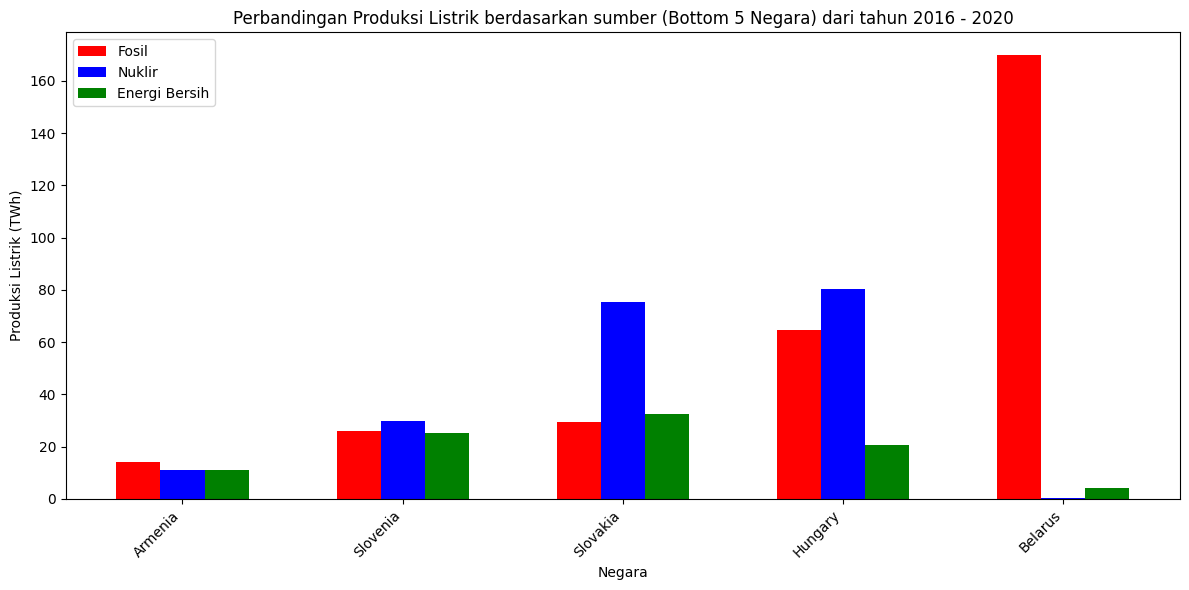

In [ ]:
# Menghapus baris dengan nilai 0 di setiap kategori
grouped_data = grouped_data[(grouped_data['electricity_fossil_fuels'] > 0) & 
                          (grouped_data['electricity_nuclear'] > 0) & 
                          (grouped_data['electricity_renewables'] > 0)]

# Menentukan 5 negara terbawah
bottom_5_countries_electricity = grouped_data.sum(axis=1).nsmallest(5)

# Menangani kasus kurang dari 5 negara
num_countries = min(5, len(bottom_5_countries_electricity))
bottom_5_countries_electricity = bottom_5_countries_electricity.head(num_countries)

# Filtering data untuk 5 negara terbawah
bottom_5_data = grouped_data.loc[bottom_5_countries_electricity.index]

# Membuat label untuk sumbu X
countries = bottom_5_data.index

# Membuat chart bar
x = range(len(countries))
width = 0.2

plt.figure(figsize=(12, 6))

plt.bar(x, bottom_5_data['electricity_fossil_fuels'], width, label='Fosil', color='red')
plt.bar([i + width for i in x], bottom_5_data['electricity_nuclear'], width, label='Nuklir', color='blue')
plt.bar([i + 2*width for i in x], bottom_5_data['electricity_renewables'], width, label='Energi Bersih', color='green')

plt.xlabel('Negara')
plt.ylabel('Produksi Listrik (TWh)')
plt.title('Perbandingan Produksi Listrik berdasarkan sumber (Bottom 5 Negara) dari tahun 2016 - 2020')
plt.xticks([i + width for i in x], countries, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

**Insight**

Mayoritas dari 5 negara terbawah masih sangat bergantung pada bahan bakar fosil (batubara, minyak, dan gas) dan nuklir sebagai sumber utama produksi listrik. Hal ini terlihat dari bar berwarna merah dan biru yang mendominasi di setiap negara. Proporsi masing-masing sumber energi bervariasi antara satu negara dengan negara lainnya. Hal ini menunjukkan bahwa setiap negara memiliki kebijakan energi dan sumber daya alam yang berbeda-beda

**Q2. Bagaimana perbandingan tingkat emisi CO2 yang dihasilkan oleh listrik yang berbahan bakar fossil, nuklir, dan terbarukan dari top 5 negara penghasil energi listrik dalam 5 tahun terakhir?**

**Top 5**

C:\Users\Gery\AppData\Local\Temp\ipykernel_19088\3396289891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['total_electricity'] = df_filtered['electricity_fossil_fuels'] + df_filtered['electricity_nuclear'] + df_filtered['electricity_renewables']
C:\Users\Gery\AppData\Local\Temp\ipykernel_19088\3396289891.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['emisi_fosil'] = df_filtered['value_co2_emissions'] * df_filtered['electricity_fossil_fuels'] / df_filtered['total_electrici

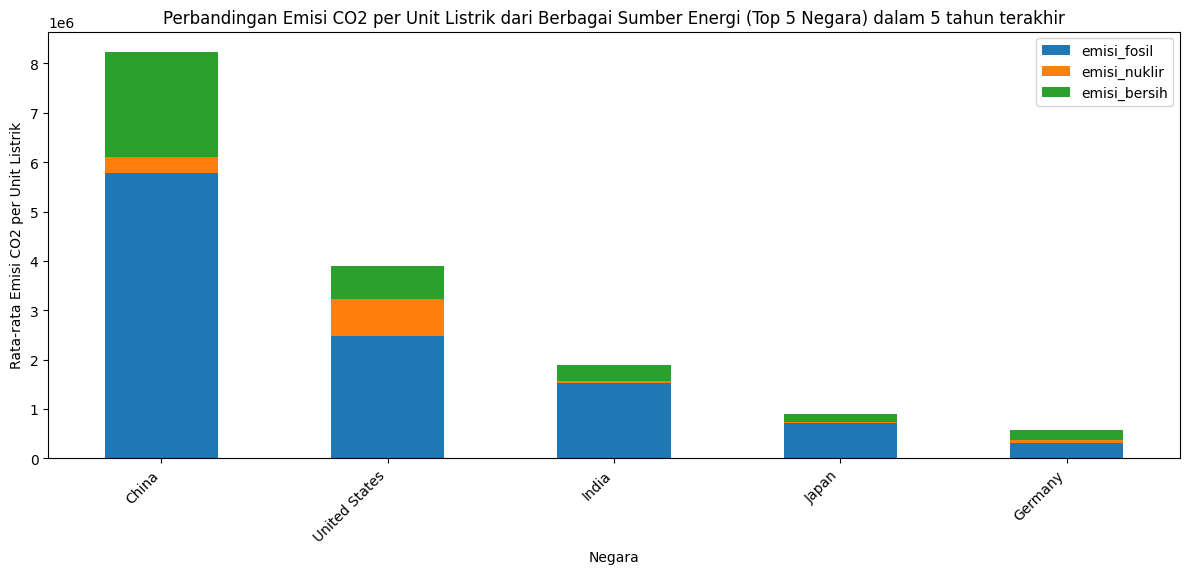

In [ ]:
# Hitung Total Produksi Listrik:
df_filtered['total_electricity'] = df_filtered['electricity_fossil_fuels'] + df_filtered['electricity_nuclear'] + df_filtered['electricity_renewables']

# Hitung Emisi CO2 untuk Setiap Sumber:
df_filtered['emisi_fosil'] = df_filtered['value_co2_emissions'] * df_filtered['electricity_fossil_fuels'] / df_filtered['total_electricity']
df_filtered['emisi_nuklir'] = df_filtered['value_co2_emissions'] * df_filtered['electricity_nuclear'] / df_filtered['total_electricity']
df_filtered['emisi_bersih'] = df_filtered['value_co2_emissions'] * df_filtered['electricity_renewables'] / df_filtered['total_electricity']

# Kelompokkan Data Berdasarkan Negara dan Hitung Rata-rata Emisi :
emisi_per_negara = df_filtered.groupby('country_name')[['emisi_fosil', 'emisi_nuklir', 'emisi_bersih']].mean()

# Urutkan berdasarkan total emisi
emisi_per_negara['total_emisi'] = emisi_per_negara.sum(axis=1)
top_5_countries_emission = emisi_per_negara.nlargest(5, 'total_emisi')

# Visualisasikan Data dalam Bentuk Chart Bar
top_5_countries_emission[['emisi_fosil', 'emisi_nuklir', 'emisi_bersih']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Perbandingan Emisi CO2 per Unit Listrik dari Berbagai Sumber Energi (Top 5 Negara) dalam 5 tahun terakhir')
plt.xlabel('Negara')
plt.ylabel('Rata-rata Emisi CO2 per Unit Listrik')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

**Insight**

Chart bar dengan jelas menunjukkan bahwa emisi CO2 terbesar dari 5 negara teratas berasal dari penggunaan bahan bakar fosil (emisi_fosil). Hal ini mengindikasikan bahwa negara-negara tersebut masih sangat bergantung pada sumber energi fosil untuk memenuhi kebutuhan listrik mereka.

Bar Chart di atas sesuai dengan data yang dimuat di transisienergi.id (https://transisienergi.id/data/emisi-co2-tahunan-negara-g20/), dimana negara yang menghasilkan emisi CO2 terbesar di Dunia adalah China, lalu diikuti oleh United States, India, russia, dan Jepang (data set yang kami miliki tidak memprovide data untuk negara Rusia).

**Bottom 5**

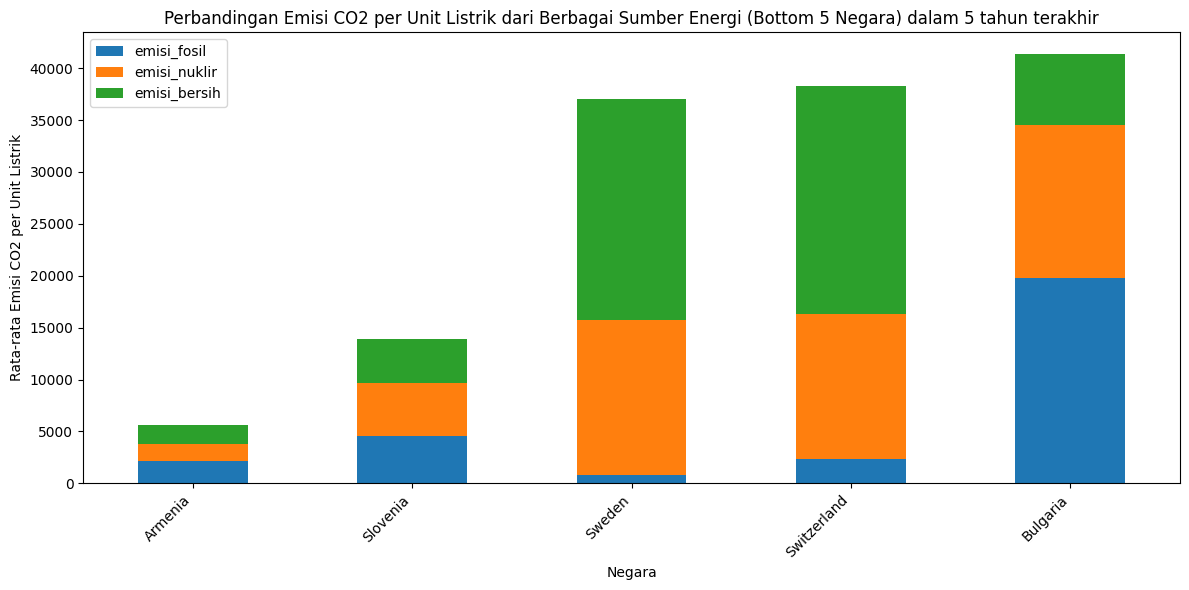

In [ ]:
# Menghapus baris dengan nilai 0 disetiap kategori
df_filtered = df_filtered[(df_filtered['electricity_fossil_fuels'] > 0) & 
                          (df_filtered['electricity_nuclear'] > 0) & 
                          (df_filtered['electricity_renewables'] > 0) &
                          (df_filtered['value_co2_emissions'] > 0)]

# Hitung Total Produksi Listrik:
df_filtered['total_electricity'] = df_filtered['electricity_fossil_fuels'] + df_filtered['electricity_nuclear'] + df_filtered['electricity_renewables']

# Hitung Emisi CO2 untuk Setiap Sumber:
df_filtered['emisi_fosil'] = df_filtered['value_co2_emissions'] * df_filtered['electricity_fossil_fuels'] / df_filtered['total_electricity']
df_filtered['emisi_nuklir'] = df_filtered['value_co2_emissions'] * df_filtered['electricity_nuclear'] / df_filtered['total_electricity']
df_filtered['emisi_bersih'] = df_filtered['value_co2_emissions'] * df_filtered['electricity_renewables'] / df_filtered['total_electricity']

# Kelompokkan Data Berdasarkan Negara dan Hitung Rata-rata Emisi :
emisi_per_negara = df_filtered.groupby('country_name')[['emisi_fosil', 'emisi_nuklir', 'emisi_bersih']].mean()

# Urutkan berdasarkan total emisi
emisi_per_negara['total_emisi'] = emisi_per_negara.sum(axis=1)
bottom_5_countries_emission = emisi_per_negara.nsmallest(5, 'total_emisi')

# Visualisasikan Data dalam Bentuk Chart Bar
bottom_5_countries_emission[['emisi_fosil', 'emisi_nuklir', 'emisi_bersih']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Perbandingan Emisi CO2 per Unit Listrik dari Berbagai Sumber Energi (Bottom 5 Negara) dalam 5 tahun terakhir')
plt.xlabel('Negara')
plt.ylabel('Rata-rata Emisi CO2 per Unit Listrik')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

**Insight**

Chart bar dengan jelas menunjukkan bahwa emisi CO2 5 negara terbawah . Hal ini mengindikasikan bahwa negara-negara tersebut masih sangat bergantung pada sumber energi fosil untuk memenuhi kebutuhan listrik mereka.  Terdapat perbedaan yang signifikan dalam pola emisi CO2 antar negara. Hal ini menunjukkan bahwa kebijakan energi dan strategi pembangunan masing-masing negara memiliki dampak besar terhadap tingkat emisi mereka.

**Q3. Bagaimana pengaruh bantuan keuangan dari negara maju terhadap negara berkembang terhadap pengembangan energi bersih dalam  5 tahun terakhir?**

In [ ]:
# Filter data untuk tahun dan klasifikasi negara
years = [2016, 2017, 2018, 2019, 2020]
country_classifications = ['Developing Country']

# Membuat DataFrame baru setelah memfilter kolom 'years' dan kolom 'country classification'
df_filtered_years = df_new[df_new['year'].isin(years)]
df_filtered_final = df_filtered_years[df_filtered_years['country_classification'].isin(country_classifications)]
df_filtered_final.head()

,country_name,year,access_electricity,access_clean_fuels,renewable_electricity,financial_flows,renewable_energy_share,electricity_fossil_fuels,electricity_nuclear,electricity_renewables,...,energy_intensity_level,value_co2_emissions,renewables,gdp_growth,gdp_per_capita,density,land_area,latitude,longitude,country_classification
16,Afghanistan,2016,97.700000,28.6,9.87,860000.0,19.92,0.15,0.0,1.06,...,2.24,5300.000191,0.0,2.260314,512.012778,60.0,652230.0,33.93911,67.709953,Developing Country
17,Afghanistan,2017,97.700000,29.7,9.79,50330000.0,19.21,0.18,0.0,1.09,...,2.30,4780.000210,0.0,2.647003,516.679862,60.0,652230.0,33.93911,67.709953,Developing Country
18,Afghanistan,2018,96.616135,30.9,9.55,70100000.0,17.96,0.20,0.0,0.97,...,2.44,6070.000172,0.0,1.189228,485.668419,60.0,652230.0,33.93911,67.709953,Developing Country
19,Afghanistan,2019,97.700000,31.9,9.58,4620000.0,18.51,0.18,0.0,0.89,...,2.41,6079.999924,0.0,3.911603,494.179350,60.0,652230.0,33.93911,67.709953,Developing Country
20,Afghanistan,2020,97.700000,33.2,9.35,0.0,0.00,0.12,0.0,0.68,...,0.00,0.000000,0.0,-2.351101,516.747871,60.0,652230.0,33.93911,67.709953,Developing Country


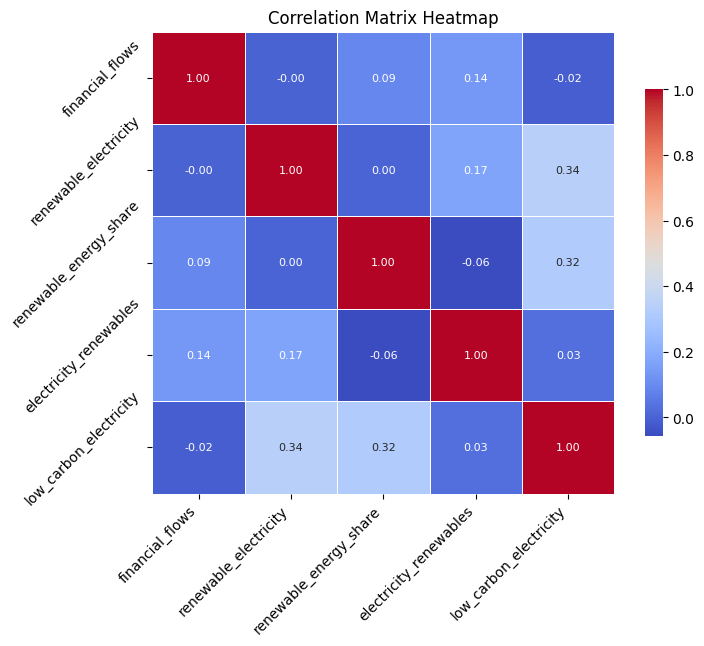

In [ ]:
# Membuat DataFrame baru sesuai dengan kebutuhan HeatMap
heatmap_df = df_filtered_final[["financial_flows", "renewable_electricity", "renewable_energy_share", "electricity_renewables", "low_carbon_electricity"]]

# Membuat korelasi matrix
correlation_matrix = heatmap_df.corr()

# Mengatur ukuran Chart 
plt.figure(figsize=(8, 6))

# Menampilkan korelasi matrix menggunakan heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,
            cbar_kws={"shrink": .75}, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
            annot_kws={"size": 8}, square=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
df_filtered_final_finance = df_filtered_final[["country_name","year","financial_flows", "renewable_electricity", "renewable_energy_share", "electricity_renewables", "low_carbon_electricity"]]
df_filtered_final_finance.head(5)

,country_name,year,financial_flows,renewable_electricity,renewable_energy_share,electricity_renewables,low_carbon_electricity
16,Afghanistan,2016,860000.0,9.87,19.92,1.06,87.603294
17,Afghanistan,2017,50330000.0,9.79,19.21,1.09,85.826775
18,Afghanistan,2018,70100000.0,9.55,17.96,0.97,82.905980
19,Afghanistan,2019,4620000.0,9.58,18.51,0.89,83.177570
20,Afghanistan,2020,0.0,9.35,0.00,0.68,85.000000


**Insight**

Dari HeatMap di atas, bisa kita lihat bahwa bantuan keuangan dari negara maju kepada negara berkembang tidak memiliki dampak terhadap pengembangan energi bersih. baik dari segi renewable electricity (alat untuk menghasilkan energi terbarukan), renewable energy share (energi terbarukan yang dihasilkan dari konsumsi energi), electricity renewables (listrik yang dihasilkan dari energi terbarukan), maupun low carbon electricity (listrik yang dihasilkan dari sumber yang memiliki kadar karbon rendah (nuklir dan energi terbarukan)). Karena tidak Memberikan dampak, maka negara negara maju memutuskan untuk memutuskan bantuan dana tersebut

**Q4. Bagaimana hubungan antara akses listrik dengan kesejahteraan penduduk di negara yang bersangkutan dalam 5 tahun terakhir?**

In [ ]:
# Memberi batas atas dari kolom untuk kepentingan visualisasi data
df_filtered_years_threshold = df_filtered_years[(df_filtered_years['access_electricity'] < 100.00) &
                                      (df_filtered_years['gdp_per_capita'] < 20000)]

Text(0, 0.5, 'access_electricity')

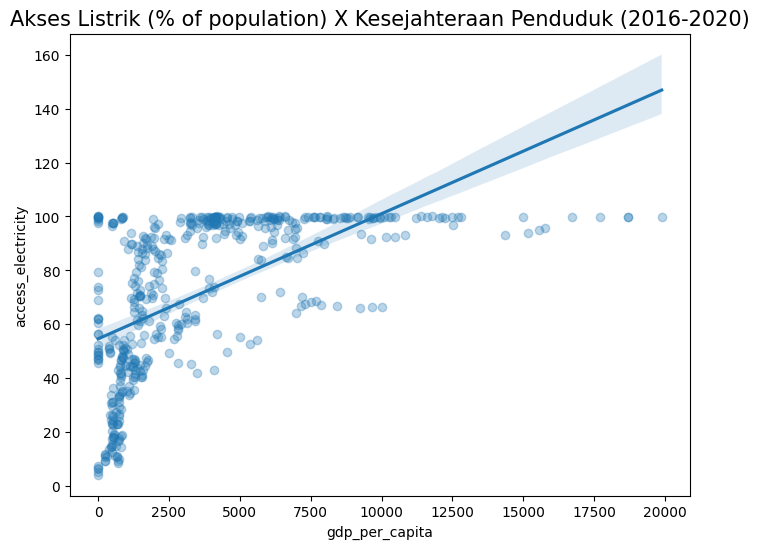

In [ ]:
# Mengatur ukuran chart
plt.figure(figsize=(8,6))

# Membuat label sumbu X dan sumbu Y, lalu memasukan dataframe yang ingin di gunakan untuk visualisasi 
sns.regplot(x='gdp_per_capita', y='access_electricity', data=df_filtered_years_threshold, scatter_kws={'alpha':0.3})

# Membuat visualisasi dari chart
plt.title('Akses Listrik (% of population) X Kesejahteraan Penduduk (2016-2020)', size=15)
plt.xlabel('gdp_per_capita')
plt.ylabel('access_electricity')

**Insight**

Berdasarkan Scatter Plot di atas, kita bisa melihat bahwa akses listrik sangat berpengaruh untuk kesejahteraan penduduk dari negara negara di dunia. Seiring dengan bertambahnya populasi suatu negara yang bisa mengakses listrik, semakin bertambah pula gdp per capita negara tersebut

**Q5. Apakah ada perbedaan antara produksi energi bersih dari negara maju dengan produksi energi bersih dari negara berkembang dalam 5 tahun terakhir?**

Hypothesis

H0 : Tidak ada perbedaan antara produksi energi bersih dari negara maju dengan produksi energi bersih dari negara berkembang

H1 : Ada perbedaan yang signifikan anatara produksi energi bersih dari negara maju dengan produksi energi bersih dari negara berkembang

In [ ]:
# Membuat DataFrame baru dengan kolom yang mempunyai 2 kategori yang berbeda
country_developing = ['Developing Country']
country_developed = ['Developed Country']
df_filtered_developing = df_filtered_years[df_filtered_years['country_classification'].isin(country_developing)]
df_filtered_developed = df_filtered_years[df_filtered_years['country_classification'].isin(country_developed)]

# Membuat grouping untuk keperluan analisis
groupA = df_filtered_developing['electricity_renewables']
groupB = df_filtered_developed['electricity_renewables']

In [ ]:
# Melakukan normality test
normality_test = shapiro(df_filtered_years['electricity_renewables'])[1]
normality_test = normality_test < 0.05
print(normality_test)

True


In [ ]:
# Melakukan homogenity of variance test
homogenity_test = stats.levene(groupA, groupB)[1]
homogenity_test = homogenity_test < 0.05
print(homogenity_test)

True


In [ ]:
# Hypothesis Testing with homogenity of variance
ttest ,p_val = stats.ttest_ind(groupA, groupB, equal_var=True)
print (ttest ,p_val)

-2.1331094526985046 0.033194070039275686


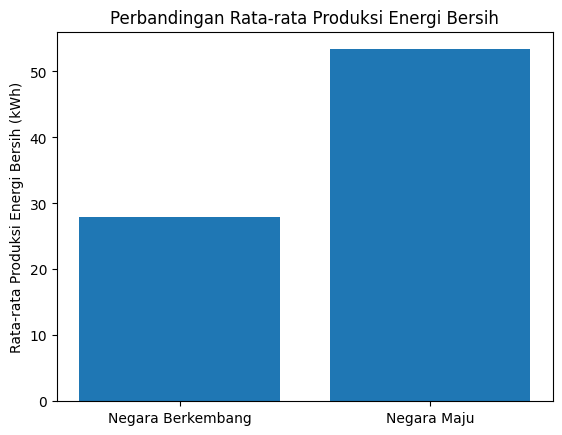

In [ ]:
mean_developing = df_filtered_developing['electricity_renewables'].mean()
mean_developed = df_filtered_developed['electricity_renewables'].mean()

categories = ['Negara Berkembang', 'Negara Maju']
means = [mean_developing, mean_developed]

plt.bar(categories, means)
plt.title('Perbandingan Rata-rata Produksi Energi Bersih')
plt.ylabel('Rata-rata Produksi Energi Bersih (kWh)')
plt.show()

**Insight**

Nilai p_value < 0.05, yang artinya H0 ditolak dan H1 diterima

H1 : Ada perbedaan yang signifikan antara produksi energi bersih dari negara maju dengan produksi energi bersih dari negara berkembang

Berdasarkan bar chart di atas, negara maju mempunyai rata rata produksi bersih yang lebih banyak dari negara berkembang. Dengan perbandingan yang cukup jauh

**Eksplorasi Tambahan Untuk Mengambil Kesimpulan**

In [ ]:
df_filtered_loc = df_filtered_years.loc[df_filtered_years['country_name'] == 'China'].sum()
print(df_filtered_loc)

country_name                                          ChinaChinaChinaChinaChina
year                                                                      10090
access_electricity                                                        500.0
access_clean_fuels                                                        376.4
renewable_electricity                                                   2457.67
financial_flows                                                    2137470000.0
renewable_energy_share                                                    53.85
electricity_fossil_fuels                                               24270.73
electricity_nuclear                                                     1471.18
electricity_renewables                                                  9224.68
low_carbon_electricity                                                152.27419
primary_energy_consumption                                           135673.215
energy_intensity_level                  

In [ ]:
df_filtered_loc = df_filtered_years.loc[df_filtered_years['country_name'] == 'United States'].sum()
print(df_filtered_loc)

country_name                  United StatesUnited StatesUnited StatesUnited ...
year                                                                      10090
access_electricity                                                        500.0
access_clean_fuels                                                        500.0
renewable_electricity                                                       0.0
financial_flows                                                             0.0
renewable_energy_share                                                    39.92
electricity_fossil_fuels                                               12878.54
electricity_nuclear                                                     4017.01
electricity_renewables                                                  3647.43
low_carbon_electricity                                               186.584453
primary_energy_consumption                                           390211.046
energy_intensity_level                  

In [ ]:
df_filtered_loc = df_filtered_years.loc[df_filtered_years['country_name'] == 'India'].sum()
print(df_filtered_loc)

country_name                                          IndiaIndiaIndiaIndiaIndia
year                                                                      10090
access_electricity                                                   473.351016
access_clean_fuels                                                        298.8
renewable_electricity                                                    425.23
financial_flows                                                    5524690000.0
renewable_energy_share                                                   131.18
electricity_fossil_fuels                                                6106.62
electricity_nuclear                                                      204.13
electricity_renewables                                                  1325.64
low_carbon_electricity                                                99.773291
primary_energy_consumption                                             32213.17
energy_intensity_level                  

# iv. Kesimpulan

Dari hasil analisa diatas, berikut kesimpulan yang bisa diambil :

Mayoritas Negara di dunia masih sangat berketergantungan dengan produksi energi listrik yang menggunakan tenaga fossil, baik itu negara maju maupun negara berkembang, yang mengakibatkan emisi CO2 dunia terus bertambah seiring berjalannya waktu (kecuali di tahun 2020 saat wabah covid menerpa dunia). Sudah seharusnya negara maju terus menambah produksi pembangun sektor penghasil energi listrik yang menggunakan energi yang terbarukan, sedangkan negara berkembang seharusnya bisa mengalokasikan dana bantuan dari negara maju dengan bijak dan tepat sasaran (untuk pembangunan energi listrik bertenaga energi terbarukan). Akses-akses listrik di tiap negara juga sudah mulai harus di perbanyak, karena sesuai data, banyaknya akses listrik pada suatu negara memiliki dampak yang cukup besar dalam kenaikan kesejahteraan penduduk negara tersebut (gdp per capita). 

External source of data :

Emisi CO2 dunia semakin meningkat tiap tahunnya : https://www.dw.com/id/cop29-emisi-karbon-global-capai-rekor-tertinggi-pada-2024/a-70774083#:~:text=Dengan%20lebih%20dari%2040%20miliar,mendorong%20pemanasan%20global%20yang%20berbahaya.


